# Import Libraries

In [1]:
from keras.utils import get_file
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import os

2023-11-22 19:42:45.378774: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 19:42:45.981041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 19:42:45.981150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 19:42:45.981993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 19:42:46.247281: I tensorflow/core/platform/cpu_feature_g

# Load the Dataset

In [2]:
# Download the data and unzip it
zip_path = get_file(
    origin="https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip",
    fname="jena_climate_2009_2016.csv.zip",
    extract=True,
)

# extract the csv path
csv_path, _ = os.path.splitext(zip_path)

In [3]:
# Load the data
df = pd.read_csv(csv_path)

# Take a copy of the dataframe for exploration
df_copy = df.copy()

# EDA

In [4]:
df_copy.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


- The column names are not very readable. 
- Convert the `Date Time` column to a suitable format for Pandas.
- Set the `Date Time` column as the index.

In [6]:
# Check if there are any missing values
df_copy.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

- There's no missing values in the dataset.

In [7]:
# Reformat the date time column to be a datetime object
df_copy.index = pd.to_datetime(df_copy.pop("Date Time"), format=r"%d.%m.%Y %H:%M:%S")

In [8]:
# Change the names of the columns to be more readable.
readable_cols = [
    "Pressure",
    "Temp",
    "Temp (Kelvin)",
    "Temp (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Max wind speed",
    "Wind direction (degrees)",
]

df_copy.columns = readable_cols

In [9]:
df_stats = df_copy.describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
Pressure,420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
Temp,420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Temp (Kelvin),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Temp (dew point),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
Relative Humidity,420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
Saturation vapor pressure,420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
Vapor pressure,420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
Vapor pressure deficit,420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
Specific humidity,420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
Water vapor concentration,420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


## Visualizations

### Data Visualization

In [10]:
# Visualize all the features overtime as subplots
def visualize_features(data: pd.DataFrame, nrows=7, ncols=2) -> None:
    sns.set_style("whitegrid")
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 25))
    for col_name, ax in zip(readable_cols, axes.flatten()):
        t_data = data[col_name]
        t_data.index = data.index

        ax = t_data.plot(
            ax=ax,
            rot=25,
        )
        ax.legend([col_name])
    plt.tight_layout()

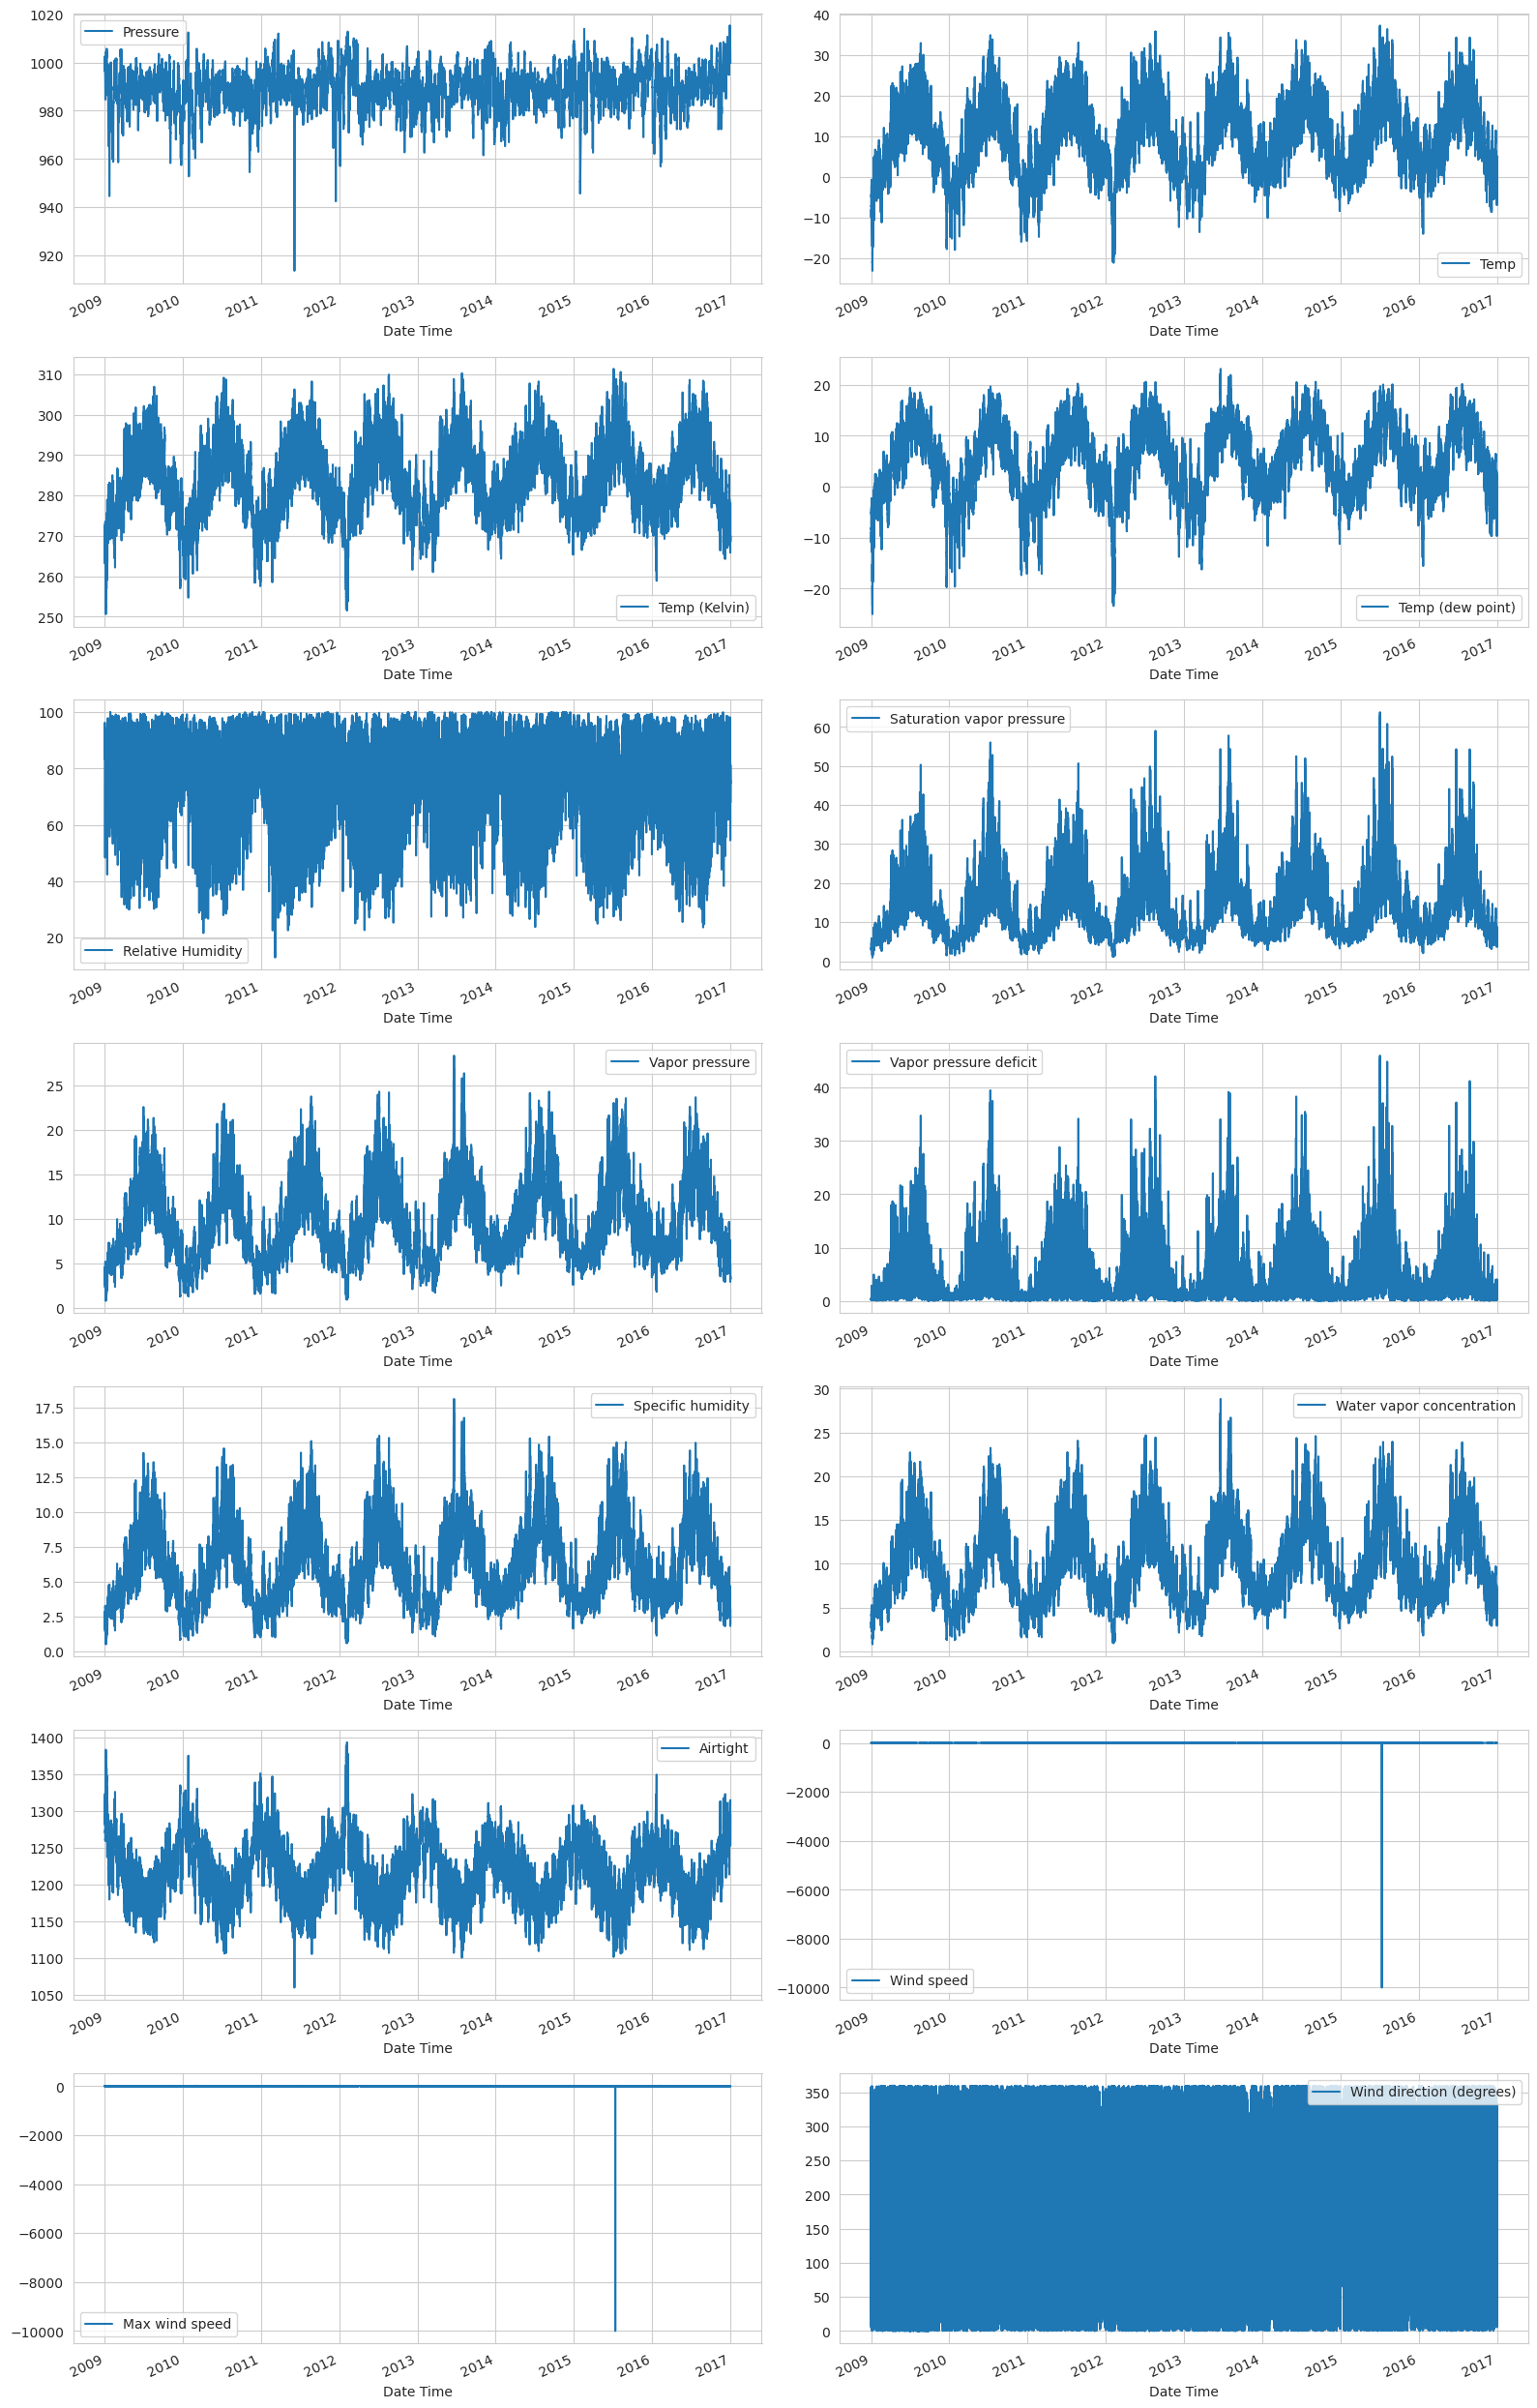

In [11]:
visualize_features(df_copy)

- There are some noise in the dataset, we may consider resampling the data to be hourly instead of every 10 minutes.
- `Wind speed` and `Max wind speed` have an outlier, that makes the plot not very readable. We will remove it.
- `Temp (kelvin)` is the same as `Temp` but in Kelvin. We will remove it.
- `Wind Direction` is oscillating between 0 and 360 degrees.
- Being weather data, it has clear daily and yearly periodicity. So, we will add `time of day` and `month of year` as features.


In [12]:
# Resample the data
df_copy = df_copy.resample("H").mean()

In [13]:
# Remove outlier from wind speed and max wind speed
mean_wind_speed = df_stats.loc["Wind speed", "50%"]

# Replace the outlier with the mean wind speed
df_copy.loc[df_copy["Wind speed"] < -100, "Wind speed"] = mean_wind_speed
df_copy.loc[df_copy["Max wind speed"] < -100, "Max wind speed"] = mean_wind_speed

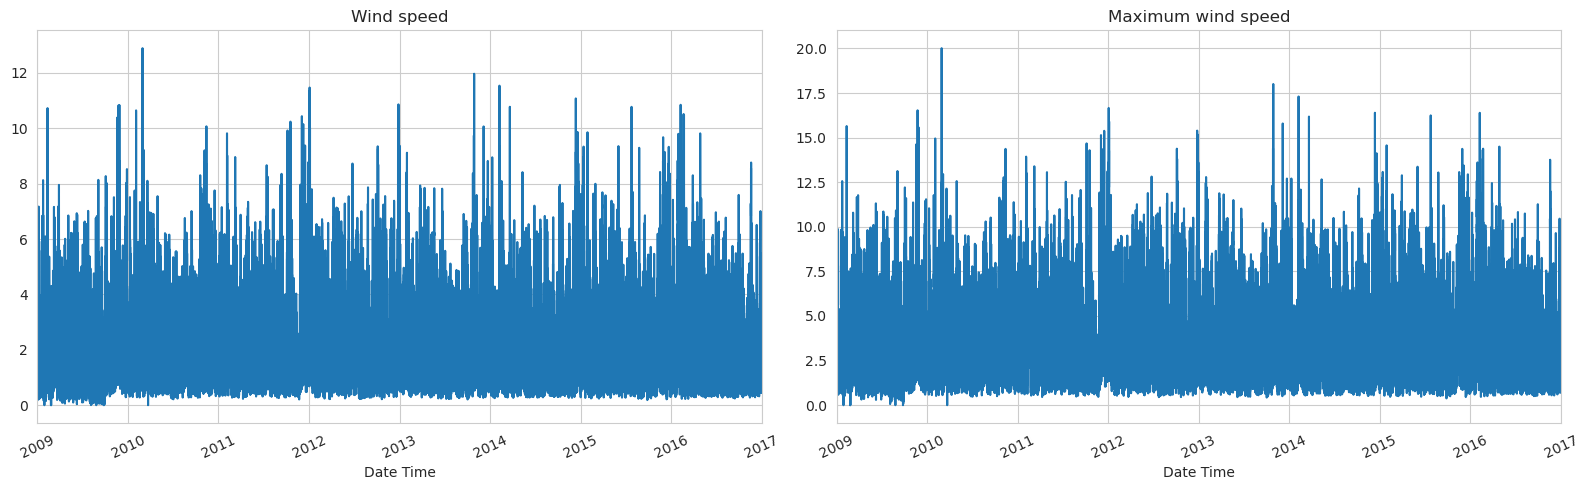

In [14]:
# Visualize the wind speed again
sns.set_style("whitegrid")
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
df_copy["Wind speed"].plot(title="Wind speed", rot=25, ax=axes[0])
df_copy["Max wind speed"].plot(title="Maximum wind speed", rot=25, ax=axes[1])
plt.tight_layout()

In [15]:
# Remove Temp (Kelvin) column
df_copy.drop("Temp (Kelvin)", axis=1, inplace=True)

### Visualize Correlation

In [16]:
df_copy_corr = df_copy.corr()

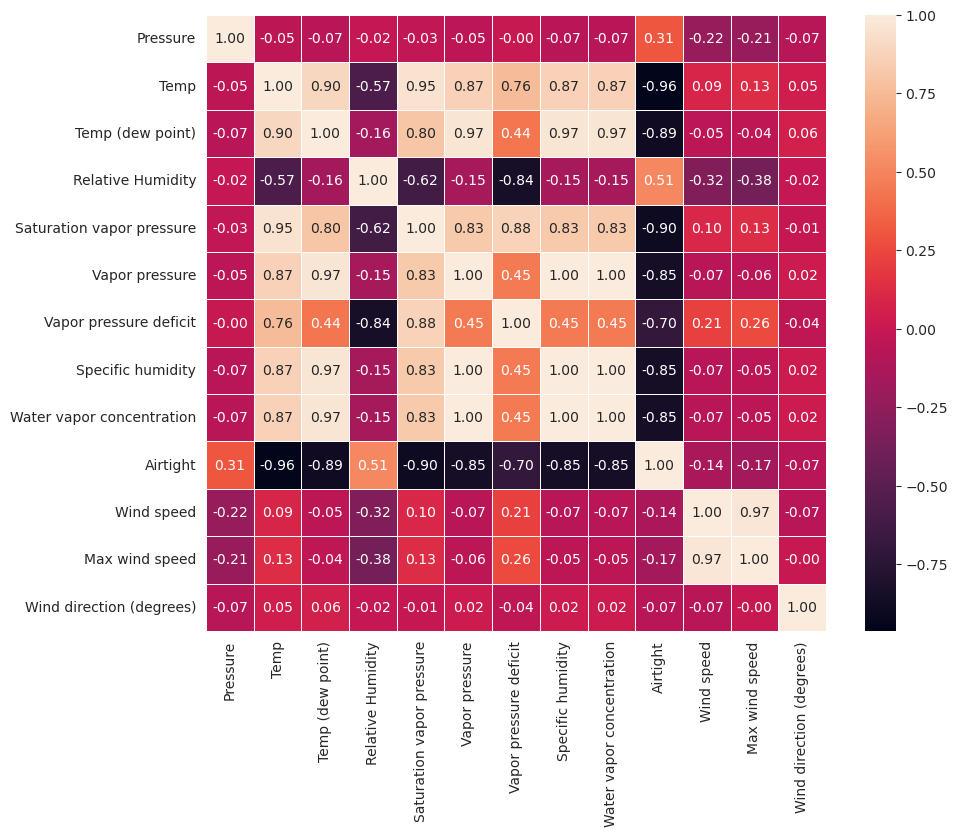

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy_corr, annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [18]:
df_copy_corr["Temp"].sort_values(ascending=False)

Temp                         1.000000
Saturation vapor pressure    0.951204
Temp (dew point)             0.896856
Vapor pressure               0.869021
Water vapor concentration    0.868516
Specific humidity            0.868097
Vapor pressure deficit       0.762056
Max wind speed               0.129532
Wind speed                   0.091549
Wind direction (degrees)     0.046040
Pressure                    -0.045224
Relative Humidity           -0.572049
Airtight                    -0.963347
Name: Temp, dtype: float64

- There's nearly no correlation between `Wind speed` and `Max wind speed` and `Temp`.
- Consider creating a new feature creates a `Wind Vector` from `Wind speed` and `Wind Direction`.

In [19]:
df_copy_corr["Wind speed"].sort_values(ascending=False)

Wind speed                   1.000000
Max wind speed               0.971773
Vapor pressure deficit       0.212478
Saturation vapor pressure    0.095904
Temp                         0.091549
Temp (dew point)            -0.054890
Water vapor concentration   -0.066779
Specific humidity           -0.066856
Wind direction (degrees)    -0.068128
Vapor pressure              -0.070534
Airtight                    -0.136372
Pressure                    -0.219762
Relative Humidity           -0.324064
Name: Wind speed, dtype: float64

- There's a strong correlation between `Wind speed` and `Max wind speed`. We will remove `Max wind speed` from the dataset.

In [20]:
# Remove Max wind speed column
df_copy.drop("Max wind speed", axis=1, inplace=True)

In [21]:
df_stats = df_copy.describe().transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
Pressure,70041.0,989.214359,8.358615,934.905000,984.206667,989.570000,994.726667,1015.243333
Temp,70041.0,9.442390,8.414647,-22.653333,3.358333,9.410000,15.461667,37.038333
Temp (dew point),70041.0,4.953446,6.727769,-24.601667,0.233333,5.215000,10.068333,23.016667
Relative Humidity,70041.0,76.028671,16.385638,13.683333,65.308333,79.266667,89.350000,100.000000
Saturation vapor pressure,70041.0,13.568619,7.725238,0.980000,7.776667,11.818333,17.598333,62.943333
Vapor pressure,70041.0,9.532337,4.180956,0.821667,6.213333,8.861667,12.351667,28.168333
Vapor pressure deficit,70041.0,4.036199,4.874833,0.000000,0.878333,2.195000,5.290000,45.195000
Specific humidity,70041.0,6.021505,2.654106,0.516667,3.918333,5.595000,7.801667,18.025000
Water vapor concentration,70041.0,9.638782,4.232169,0.828333,6.283333,8.963333,12.481667,28.661667
Airtight,70041.0,1216.098209,39.941547,1084.358333,1187.508333,1213.815000,1242.770000,1392.175000


# Save the dataset

In [22]:
df_copy.to_csv("../data/eda_data.csv")